In [1]:
# Essential Imports

import numpy as np
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)

from qiskit.visualization import (plot_histogram, 
                                  plot_bloch_multivector)

from matplotlib.animation import FuncAnimation

import warnings

In [2]:
# PART a

<img src="a).jpg"/>

In [3]:
# Using Aer's statevector_simulator

simulator = Aer.get_backend('statevector_simulator')

In [4]:
def plot_qubit(theta, phi, i, j):
    
    # Variational Quantum Circuit to generate 
    # the most generalized 1 qubit state 

    circuit = QuantumCircuit(1, 1)
    
    # Using the U3 gate to parameterize the |0> state
    
    circuit.u3(theta, phi, 0, 0)
    
    # Getting the resultant statevector
    
    result = execute(circuit, backend=simulator).result()
    statevector = result.get_statevector()
    
    path = "qubit/" + "out" + str(i+1) + str(j) + ".png"
    
    # Saving the Bloch sphere plot
    
    plot_bloch_multivector(statevector).savefig(path)

In [5]:
# Theta and Phi for plotting general qubit state

theta = np.linspace(0, np.pi, 9)
phi = np.linspace(0, 2*np.pi, 9)

for i in range(9):
    for j in range(9):
        plot_qubit(theta[i], phi[j], i, j)

In [6]:
# Combining the png images into mp4 video format
# NO NEED TO RUN THIS BLOCK
# MP4 FILE IS UPLOADED ON GITHUB

import ffmpeg
(
    ffmpeg
    .input('qubit/*.png', pattern_type='glob', framerate=25)
    .output('movie.mp4')
    .run()
)

warnings.filterwarnings('ignore')

In [7]:
%%HTML

<div align="middle">
    <video width="80%" controls>
          <source src="movie.mp4" type="video/mp4">
    </video>
</div>

In [8]:
# RESULT: Hence any arbitrary 1 qubit state on the Bloch sphere can be achieved using the U3 gate.

In [9]:
# PART b

<img src="b).jpg" />

In [10]:
# Using Aer's qasm_simulator

simulator = Aer.get_backend('qasm_simulator')

In [11]:
def swap_test(theta1, phi1, theta2, phi2, shots):
    
    # FUNCTIONAL IMPLEMENTATION OF THE SWAP TEST
    
    # Quantum Circuit
    circuit = QuantumCircuit(3, 1)

    circuit.h(0)
    circuit.u3(theta1, phi1, 0, 1)
    circuit.u3(theta2, phi2, 0, 2)
    circuit.cswap(0, 1, 2)
    circuit.h(0)

    circuit.measure(0, 0)

    # Executing the circuit on the qasm simulator
    job = execute(circuit, simulator, shots=shots)

    # Grabbing results from the job
    result = job.result()

    # Returns counts
    counts = result.get_counts(circuit)
    
    # Calculating the probability of getting the |0> state
    count = counts['0']/shots
    
    return count

In [12]:
def Qubit_params(theta, phi):
    
    # FUNCTION TO REPRODUCE A RANDOMLY GENERATED 1 QUBIT STATE
    
    # Given that the randomly generated 1 qubit state
    # will be of the form: a|0> + exp(ip1) * b|1>
    # where a = cos(t1/2) and b = sin(t1/2)
    
    # Result of the SWAP TEST
    # Prob(0) = (1 + |<q2|q1>|^2) / 2
    
    # Measurement - 1
    prob = swap_test(theta, phi, 0, 0, shots)
    
    # Assuming |q> = a|0> + exp(ip) * b|1>
    a = np.sqrt(2 * prob - 1)
    b = np.sqrt(2 - 2 * prob)
    
    # Theta
    t = 2 * np.arccos(a)
    
    # Measurement - 2
    prob = swap_test(theta, phi, np.pi/2, 0, shots)
    
    # Phi
    p = np.arccos(2 * ((prob - 0.75) / (a * b)))

    # Measurement - 3
    prob = swap_test(theta, phi, t, p, shots)
    
    # Mapping to Phi either [0, pi] or [pi, 2*pi]
    
    error = 0.005
    
    if(prob < (1 - error)):
        p = 2 * np.pi - p
    
    return [t, p]

In [13]:
# Generating a random 1 qubit state 

theta = np.pi * np.random.random()
phi = 2 * np.pi * np.random.random()

# Measurement parameter
shots = 1000

# Theta and Phi value of the random state

t, p = Qubit_params(theta, phi)

In [14]:
# Circuit to check the similarity between the randomly
# generated qubit and the reproduced qubit state
# using the SWAP test

circuit = QuantumCircuit(3, 1)

circuit.h(0)
circuit.u3(theta, phi, 0, 1)
circuit.u3(t, p, 0, 2)
circuit.cswap(0, 1, 2)
circuit.h(0)

circuit.measure(0, 0)

print("Theta of original state: ", theta)
print("Theta of reproduced state: ", t)
print("Phi of original state: ", phi)
print("Phi of reproduced state: ", p)

Theta of original state:  0.6114337579401848
Theta of reproduced state:  0.5952648839776852
Phi of original state:  2.980091784429706
Phi of reproduced state:  2.626601405381011


In [15]:
# Drawing the check circuit

circuit.draw()

┌───┐             ┌───┐┌─┐
q_0: ─────────┤ H ├───────────■─┤ H ├┤M├
     ┌────────┴───┴─────────┐ │ └───┘└╥┘
q_1: ┤ U3(0.61143,2.9801,0) ├─X───────╫─
     ├──────────────────────┤ │       ║ 
q_2: ┤ U3(0.59526,2.6266,0) ├─X───────╫─
     └──────────────────────┘         ║ 
c_0: ═════════════════════════════════╩═

In [16]:
# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=shots)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)

print("\nTotal count for 0 is:",counts)


Total count for 0 is: {'1': 1, '0': 999}


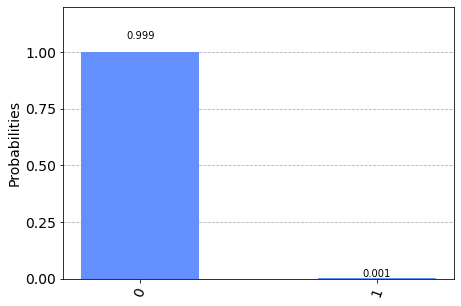

In [17]:
# Histogram plot
plot_histogram(counts)

In [18]:
# RESULT: As the probability of measuring 0 is 0.999 (in the 1st qubit) thus,
# the randomly generated 1 qubit state has successfully been reproduced onto
# another qubit with very high accuracy

In [19]:
# PART c

<img src="c).jpg" />

In [20]:
# Using Aer's qasm_simulator

simulator = Aer.get_backend('qasm_simulator')

In [21]:
# Parameters

N = 10
shots = 1000

# Random Input Product state 
I = np.random.randint(2, size=N)
ps = np.pi * I

# Initializing the Output State
state = np.zeros(N)

# Performing the SWAP test Qubit by Qubit on the Product state

for i in range(N):
    
    # Circuit
    circuit = QuantumCircuit(N+2, 1)

    circuit.h(0)
    
    # Test qubit
    circuit.u3(0, 0, 0, 1)
    
    # Initialzing the Product state
    for k in range(N):
        circuit.u3(ps[k], 0, 0, k+2)
    
    # Performing the SWAP test on the ith qubit in the Product state
    
    circuit.cswap(0, 1, i+2)
    circuit.h(0)
    circuit.measure(0, 0)
    
    # Execute the circuit on the qasm simulator
    job = execute(circuit, simulator, shots=shots)

    # Grab results from the job
    result = job.result()

    # Returns counts
    counts = result.get_counts(circuit)
    
    # Reconstructing the Product state
    state[i] = int(1 - np.rint(2 * (counts['0']/shots - 0.5)))
    
    
# Check for equality of original and reconstructed state

print(np.array_equal(I, state))

True


In [22]:
print("Input N qubit state: ", I)
print("Reconstructed N qubit state: ", state)

Input N qubit state:  [1 1 0 1 0 0 1 0 1 1]
Reconstructed N qubit state:  [1. 1. 0. 1. 0. 0. 1. 0. 1. 1.]


In [23]:
# RESULT: The randomly generated N qubit product state has
# successfully been reconstructed using the SWAP test qubit by qubit